<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
        
    
### <font color='navy'> Simulación matemática. 

**Nombres:** Andrés Santoyo Puga, Talpa de Jesus Ornelas Guitron, Emiliano Hernandez Campos.

**Fecha:** 15 de noviembre del 2023.

**Expediente** : 744444,744417 .
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: 

# Proyecto 3

## 1) Ejercicio 1

Diseñar una función que permita realizar una corrida de un préstamo bancario (construir una tabla de amortización) usando la misma idea que la estudiada en el modelo de ahorro. Se espera que con la función propuesta puedan realizar diferentes análisis y puedan comparar usando distintos escenarios, como se muestra a continuación

## Objetivos 

### Objetivos generales

- Comprender la dinámica del interés, la inflación y su impacto en el ahorro: Explorar cómo estos conceptos interactúan en el ámbito financiero y cómo afectan las decisiones de ahorro.

- Evaluar la influencia de las tasas de interés en las decisiones de ahorro: Analizar cómo las variaciones en las tasas de interés afectan el comportamiento de ahorro de los individuos y las instituciones financieras.

- Examinar el papel de la inflación en la gestión de ahorros a largo plazo: Investigar cómo la inflación puede erosionar el valor de los ahorros y cómo mitigar este impacto.



### Objetivos especificos

- Analizar las diferentes formas de interés: Desglosar los tipos de interés, como simple y compuesto, y su influencia en el crecimiento de los ahorros.

- Evaluar las tasas de interés en productos financieros: Examinar las tasas de interés ofrecidas en cuentas de ahorro, certificados de depósito, bonos u otras opciones de inversión, y su impacto en el rendimiento financiero.

- Estudiar la relación entre tasas de interés y riesgo: Investigar cómo el riesgo asociado con ciertos instrumentos financieros afecta las decisiones de ahorro y las tasas de interés requeridas.

- Analizar la relación entre inflación y ahorro: Examinar cómo la inflación histórica ha afectado los ahorros y proyectar posibles escenarios futuros.

- Identificar estrategias para proteger el ahorro contra la inflación: Explorar instrumentos financieros o estrategias de inversión que puedan ayudar a preservar el poder adquisitivo del ahorro en un entorno inflacionario.

- Examinar el impacto psicológico de la inflación en las decisiones de ahorro: Investigar cómo las percepciones de la inflación influyen en las actitudes hacia el ahorro a largo plazo.

- Comparar políticas y prácticas de gestión de ahorros en diferentes entornos económicos: Analizar cómo las políticas económicas y las condiciones locales afectan las estrategias de ahorro.

In [1]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import numpy as np
import numpy_financial as npf

In [2]:
# Datos para el prestamo
tasa_interes = 0.3052
years = 3
abono_year = 12
num_pags = years * abono_year
cant_pres = 85000
abono_extra = 500
abono_extra1 = 1000
abono_extra2 = 2000
fecha_inicio = (date(2023,10,30))

In [3]:
# Cálculo de abonos mensuales iguales para llegar a la meta de ahorro en el tiempo deseado
cuota = -npf.pmt(tasa_interes/abono_year,years*abono_year,(cant_pres))
cuota

3632.6358092113683

In [4]:
# Cálculo de la cuota mensual constante para el préstamo
cuota = -npf.pmt(tasa_interes/abono_year, num_pags, cant_pres)

# Rango de fechas en la tabla
rng = pd.date_range(fecha_inicio, periods=num_pags, freq='M')
rng.name = 'Fecha del abono'

# Crear DataFrame para el caso sin abono extra
df_sin_abono = pd.DataFrame(index=rng, columns=['Deuda Inicial', 'Cuota', 'Deuda Restante'], dtype='float')
df_sin_abono.reset_index(inplace=True)
df_sin_abono.index += 1
df_sin_abono.index.name = 'Periodo'

# Vector indizador de los periodos de los abonos para el caso sin abono extra
index_vector_sin_abono = np.arange(1, len(rng)+1)

# Cálculos para el caso sin abono extra
deuda_sin_abono = cant_pres
deuda_restante_sin_abono = cant_pres * (1 + tasa_interes/abono_year)**index_vector_sin_abono - \
                 cuota * (((1 + tasa_interes/abono_year)**index_vector_sin_abono - 1)/(tasa_interes/abono_year))

# Llenar DataFrame para el caso sin abono extra
df_sin_abono['Deuda Inicial'] = deuda_sin_abono
df_sin_abono['Cuota'] = cuota
df_sin_abono['Deuda Restante'] = deuda_restante_sin_abono 
df_sin_abono = df_sin_abono.round(2)

# Crear DataFrame para el caso con abono extra 
df_con_abono = pd.DataFrame(index=rng, columns=['Deuda Inicial', 'Cuota', 'Abono Extra', 'Deuda Restante'], dtype='float')
df_con_abono.reset_index(inplace=True)
df_con_abono.index += 1
df_con_abono.index.name = 'Periodo'

# Vector indizador de los periodos de los abonos para el caso con abono extra
index_vector_con_abono = np.arange(1, len(rng)+1)

abonoF = cuota + abono_extra
# Cálculos para el caso con abono extra 1
deuda_con_abono = cant_pres
deuda_restante_con_abono = cant_pres * (1 + tasa_interes/abono_year)**index_vector_con_abono - \
                 abonoF * (((1 + tasa_interes/abono_year)**index_vector_con_abono - 1)/(tasa_interes/abono_year))

# Llenar DataFrame para el caso con abono extra 
df_con_abono['Deuda Inicial'] = deuda_con_abono
df_con_abono['Cuota'] = cuota
df_con_abono['Abono Extra'] = abono_extra
df_con_abono['Deuda Restante'] = deuda_restante_con_abono
df_con_abono = df_con_abono.round(2)


# Crear DataFrame para el caso con abono extra 1
df_con_abono1 = pd.DataFrame(index=rng, columns=['Deuda Inicial', 'Cuota', 'Abono Extra', 'Deuda Restante'], dtype='float')
df_con_abono1.reset_index(inplace=True)
df_con_abono1.index += 1
df_con_abono1.index.name = 'Periodo'

# Vector indizador de los periodos de los abonos para el caso con abono extra 1
index_vector_con_abono1 = np.arange(1, len(rng)+1)

abonoF1 = cuota + abono_extra1
# Cálculos para el caso con abono extra 1
deuda_con_abono1 = cant_pres
deuda_restante_con_abono1 = cant_pres * (1 + tasa_interes/abono_year)**index_vector_con_abono1 - \
                 abonoF1 * (((1 + tasa_interes/abono_year)**index_vector_con_abono1 - 1)/(tasa_interes/abono_year))

# Llenar DataFrame para el caso con abono extra 1
df_con_abono1['Deuda Inicial'] = deuda_con_abono1
df_con_abono1['Cuota'] = cuota
df_con_abono1['Abono Extra'] = abono_extra1
df_con_abono1['Deuda Restante'] = deuda_restante_con_abono1
df_con_abono1 = df_con_abono1.round(2)


# Crear DataFrame para el caso con abono extra 2
df_con_abono2 = pd.DataFrame(index=rng, columns=['Deuda Inicial', 'Cuota', 'Abono Extra', 'Deuda Restante'], dtype='float')
df_con_abono2.reset_index(inplace=True)
df_con_abono2.index += 1
df_con_abono2.index.name = 'Periodo'

# Vector indizador de los periodos de los abonos para el caso con abono extra 2
index_vector_con_abono2 = np.arange(1, len(rng)+1)

abonoF2 = cuota + abono_extra2
# Cálculos para el caso con abono extra 2
deuda_con_abono2 = cant_pres
deuda_restante_con_abono2 = cant_pres * (1 + tasa_interes/abono_year)**index_vector_con_abono2 - \
                 abonoF2 * (((1 + tasa_interes/abono_year)**index_vector_con_abono2 - 1)/(tasa_interes/abono_year))

# Llenar DataFrame para el caso con abono extra 2
df_con_abono2['Deuda Inicial'] = deuda_con_abono2
df_con_abono2['Cuota'] = cuota
df_con_abono2['Abono Extra'] = abono_extra2
df_con_abono2['Deuda Restante'] = deuda_restante_con_abono2 
df_con_abono2 = df_con_abono2.round(2)


In [5]:
df_sin_abono

,Fecha del abono,Deuda Inicial,Cuota,Deuda Restante
Periodo,,,,
1,2023-10-31,85000,3632.64,83529.20
2,2023-11-30,85000,3632.64,82020.99
3,2023-12-31,85000,3632.64,80474.42
4,2024-01-31,85000,3632.64,78888.52
5,2024-02-29,85000,3632.64,77262.28
6,2024-03-31,85000,3632.64,75594.68
7,2024-04-30,85000,3632.64,73884.67
8,2024-05-31,85000,3632.64,72131.17
9,2024-06-30,85000,3632.64,70333.07


In [6]:
df_con_abono

,Fecha del abono,Deuda Inicial,Cuota,Abono Extra,Deuda Restante
Periodo,,,,,
1,2023-10-31,85000,3632.64,500,83029.20
2,2023-11-30,85000,3632.64,500,81008.27
3,2023-12-31,85000,3632.64,500,78935.95
4,2024-01-31,85000,3632.64,500,76810.91
5,2024-02-29,85000,3632.64,500,74631.84
6,2024-03-31,85000,3632.64,500,72397.34
7,2024-04-30,85000,3632.64,500,70106.01
8,2024-05-31,85000,3632.64,500,67756.40
9,2024-06-30,85000,3632.64,500,65347.03


In [7]:
df_con_abono1

,Fecha del abono,Deuda Inicial,Cuota,Abono Extra,Deuda Restante
Periodo,,,,,
1,2023-10-31,85000,3632.64,1000,82529.20
2,2023-11-30,85000,3632.64,1000,79995.55
3,2023-12-31,85000,3632.64,1000,77397.47
4,2024-01-31,85000,3632.64,1000,74733.31
5,2024-02-29,85000,3632.64,1000,72001.39
6,2024-03-31,85000,3632.64,1000,69199.99
7,2024-04-30,85000,3632.64,1000,66327.34
8,2024-05-31,85000,3632.64,1000,63381.63
9,2024-06-30,85000,3632.64,1000,60361.00


In [8]:
df_con_abono2

,Fecha del abono,Deuda Inicial,Cuota,Abono Extra,Deuda Restante
Periodo,,,,,
1,2023-10-31,85000,3632.64,2000,81529.20
2,2023-11-30,85000,3632.64,2000,77970.12
3,2023-12-31,85000,3632.64,2000,74320.53
4,2024-01-31,85000,3632.64,2000,70578.11
5,2024-02-29,85000,3632.64,2000,66740.51
6,2024-03-31,85000,3632.64,2000,62805.31
7,2024-04-30,85000,3632.64,2000,58770.02
8,2024-05-31,85000,3632.64,2000,54632.10
9,2024-06-30,85000,3632.64,2000,50388.94


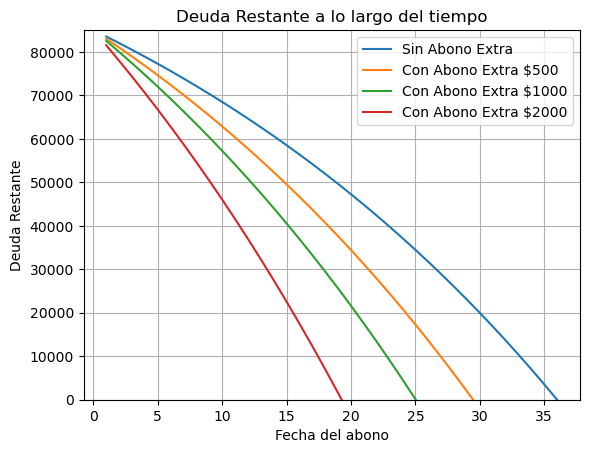

In [9]:
# Gráfica para el caso sin abono extra
plt.plot(df_sin_abono.index, df_sin_abono['Deuda Restante'], label='Sin Abono Extra', marker='')

# Gráfica para el caso con abono extra 
plt.plot(df_con_abono.index, df_con_abono['Deuda Restante'], label='Con Abono Extra $500', marker='')


# Gráfica para el caso con abono extra 1
plt.plot(df_con_abono1.index, df_con_abono1['Deuda Restante'], label='Con Abono Extra $1000', marker='')

# Gráfica para el caso con abono extra 2
plt.plot(df_con_abono2.index, df_con_abono2['Deuda Restante'], label='Con Abono Extra $2000', marker='')

plt.title('Deuda Restante a lo largo del tiempo')
plt.xlabel('Fecha del abono')
plt.ylabel('Deuda Restante')
plt.legend()
plt.grid(True)

# Establecer los límites del eje y de la deuda
plt.ylim(0, 85000)

plt.show()


In [10]:
#cant_pres = 100000
tasa_interes = 0.1520

In [11]:
# Crear DataFrame para el caso con abono extra 
df_con_abono = pd.DataFrame(index=rng, columns=['Deuda Inicial', 'Cuota', 'Abono Extra', 'Deuda Restante'], dtype='float')
df_con_abono.reset_index(inplace=True)
df_con_abono.index += 1
df_con_abono.index.name = 'Periodo'

# Vector indizador de los periodos de los abonos para el caso con abono extra
index_vector_con_abono = np.arange(1, len(rng)+1)
abonoF = cuota + abono_extra

# Cálculos para el caso con abono extra 1
deuda_con_abono = cant_pres
deuda_restante_con_abono = cant_pres * (1 + tasa_interes/abono_year)**index_vector_con_abono - \
                 abonoF * (((1 + tasa_interes/abono_year)**index_vector_con_abono - 1)/(tasa_interes/abono_year))

# Llenar DataFrame para el caso con abono extra 
df_con_abono['Deuda Inicial'] = deuda_con_abono
df_con_abono['Cuota'] = cuota
df_con_abono['Abono Extra'] = abono_extra
df_con_abono['Deuda Restante'] = deuda_restante_con_abono
df_con_abono = df_con_abono.round(2)

In [12]:
#cant_pres = 150000
tasa_interes = 0.3500

In [13]:
# Crear DataFrame para el caso con abono extra 2
df_con_abono2 = pd.DataFrame(index=rng, columns=['Deuda Inicial', 'Cuota', 'Abono Extra', 'Deuda Restante'], dtype='float')
df_con_abono2.reset_index(inplace=True)
df_con_abono2.index += 1
df_con_abono2.index.name = 'Periodo'

# Vector indizador de los periodos de los abonos para el caso con abono extra 2
index_vector_con_abono2 = np.arange(1, len(rng)+1)

abonoF2 = cuota + abono_extra2
# Cálculos para el caso con abono extra 2
deuda_con_abono2 = cant_pres
deuda_restante_con_abono2 = cant_pres * (1 + tasa_interes/abono_year)**index_vector_con_abono2 - \
                 abonoF2 * (((1 + tasa_interes/abono_year)**index_vector_con_abono2 - 1)/(tasa_interes/abono_year))

# Llenar DataFrame para el caso con abono extra 2
df_con_abono2['Deuda Inicial'] = deuda_con_abono2
df_con_abono2['Cuota'] = cuota
df_con_abono2['Abono Extra'] = abono_extra2
df_con_abono2['Deuda Restante'] = deuda_restante_con_abono2 
df_con_abono2 = df_con_abono2.round(2)


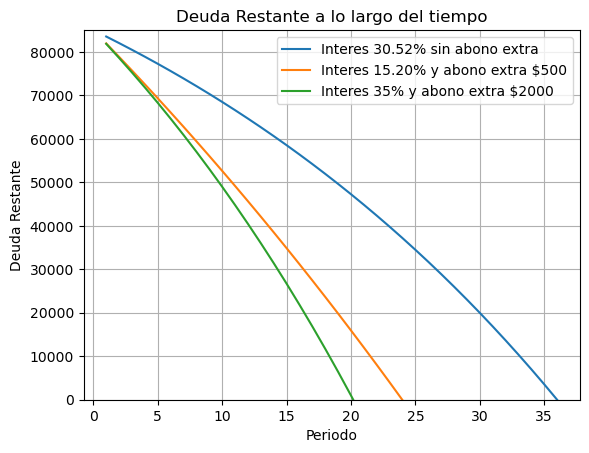

In [14]:
# Gráfica para el caso sin abono extra
plt.plot(df_sin_abono.index, df_sin_abono['Deuda Restante'], label='Interes 30.52% sin abono extra', marker='')

# Gráfica para el caso con abono extra 
plt.plot(df_con_abono.index, df_con_abono['Deuda Restante'], label='Interes 15.20% y abono extra $500', marker='')

# Gráfica para el caso con abono extra 2
plt.plot(df_con_abono2.index, df_con_abono2['Deuda Restante'], label='Interes 35% y abono extra $2000', marker='')

plt.title('Deuda Restante a lo largo del tiempo')
plt.xlabel('Periodo')
plt.ylabel('Deuda Restante')
plt.legend()
plt.grid(True)

# Establecer los límites del eje y de la deuda
plt.ylim(0, 85000)

plt.show()

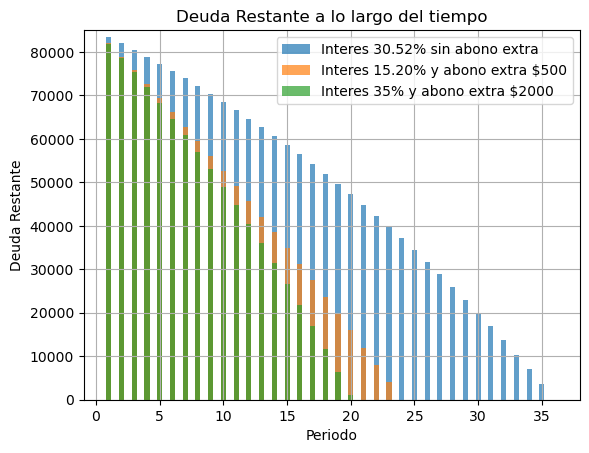

In [15]:
# Gráfica para el caso sin abono extra
plt.bar(df_sin_abono.index, df_sin_abono['Deuda Restante'], label='Interes 30.52% sin abono extra', alpha=0.7, width=0.4)

# Gráfica para el caso con abono extra 
plt.bar(df_con_abono.index, df_con_abono['Deuda Restante'], label='Interes 15.20% y abono extra $500', alpha=0.7, width=0.4)

# Gráfica para el caso con abono extra 2
plt.bar(df_con_abono2.index, df_con_abono2['Deuda Restante'], label='Interes 35% y abono extra $2000', alpha=0.7, width=0.4)

plt.title('Deuda Restante a lo largo del tiempo')
plt.xlabel('Periodo')
plt.ylabel('Deuda Restante')
plt.legend()
plt.grid(True)

# Establecer los límites del eje y de la deuda
plt.ylim(0, 85000)
plt.show()


## Conclusiones

La relación entre el interés, la inflación y el ahorro es crucial para optimizar la gestión financiera personal. Mientras que el interés puede trabajar a favor o en contra de nuestros ahorros dependiendo de cómo se utilice, la inflación presenta un desafío constante. Es fundamental buscar estrategias que permitan que los rendimientos superen la inflación, garantizando así que nuestros ahorros conserven su poder adquisitivo a lo largo del tiempo.

En resumen, comprender el interés y la inflación es esencial para tomar decisiones financieras informadas sobre el ahorro. La gestión efectiva de estos conceptos puede marcar la diferencia entre el crecimiento sostenible de los ahorros y la pérdida de poder adquisitivo a lo largo del tiempo.

## 2) Ejercicio 2

Tomar un modelo físico que pueda ser escrito mediante un conjunto de ecuaciones diferenciales y se solucione numéricamente. El modelo físico seleccionado debe tener tres o más ecuaciones diferenciales. Luego de obtener la solución se debe de analizar gráficamente dichas soluciones y concluir acerca del comportamiento

## Objetivos